In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler 

In [30]:
import seaborn as sns

In [13]:
df = pd.read_csv('income.csv')

In [14]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [15]:
df.isna().sum()

Name         0
Age          0
Income($)    0
dtype: int64

In [16]:
df.dtypes

Name         object
Age           int64
Income($)     int64
dtype: object

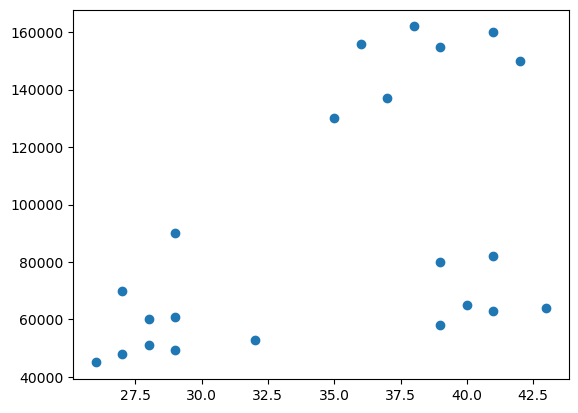

In [17]:
plt.scatter(x=df['Age'],y=df['Income($)'])
plt.show()

In [18]:
km  = KMeans(n_clusters=3,n_init=10)
km

KMeans(n_clusters=3, n_init=10)

In [22]:
km.init,km.n_init,km.max_iter

('k-means++', 10, 300)

In [27]:
y_clusters = km.fit_predict(df[['Age','Income($)']])
y_clusters

C:\Users\APU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

Solution for UserWarning (By ChatGPT):
In the context of the KMeans algorithm with the Intel Math Kernel Library (MKL) on Windows, it seems that there is a specific issue related to how the algorithm handles parallel processing when using multiple threads.

Memory Leak:
A memory leak occurs when a computer program allocates memory for certain operations but fails to release or deallocate that memory afterward. In this case, the warning suggests that there is a memory leak issue within the KMeans algorithm when certain conditions are met.

Data Chunks:
In the context of parallel computing, data chunks refer to portions of the dataset that are divided among multiple processing units (threads) to be processed concurrently. Each thread works on its assigned data chunk independently.

Available Threads:
Threads are individual units of a computer program that can execute independently. In the context of parallel computing, having multiple threads allows different parts of a task to be performed simultaneously.

Now, the warning suggests that the memory leak issue occurs specifically when there are fewer data chunks (portions of the dataset) than there are available threads. This could mean that the algorithm is not managing memory properly in situations where parallel processing is happening with a certain number of threads, and the number of data chunks is insufficient.

To address this issue, the warning recommends setting the environment variable OMP_NUM_THREADS to 1. By doing this, you are essentially instructing the algorithm to use only one thread for parallel processing, potentially avoiding the conditions that lead to the memory leak.

It's worth noting that adjusting the number of threads can impact the performance of parallelized computations. Setting it to 1 is a workaround to mitigate the memory leak, but it might reduce the efficiency of parallel processing. If possible, it's advisable to check for updates or patches related to the specific version of the library to see if the issue has been addressed in newer releases.

In [28]:
df['cluster'] = y_clusters

In [29]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


C:\Users\APU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


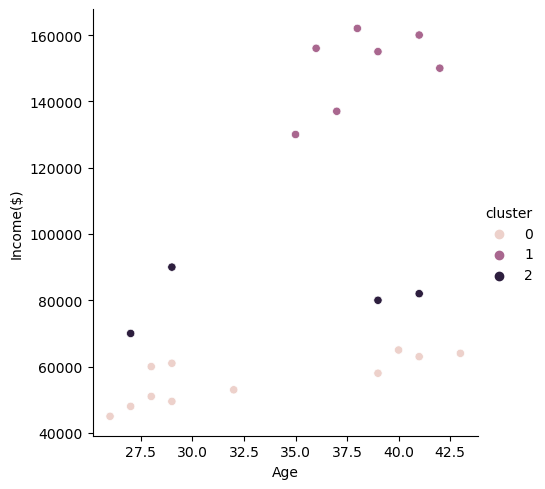

In [31]:
sns.relplot(data = df,x='Age',y='Income($)',hue='cluster',kind='scatter')
plt.show()

In [32]:
scaler = MinMaxScaler()

In [33]:
scaler.fit(df[['Income($)']])

MinMaxScaler()

In [34]:
df['Income($)'] = scaler.transform(df[['Income($)']])

In [35]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [36]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [37]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [39]:
y_clusters_scaled = km.fit_predict(df[['Age','Income($)']])
y_clusters_scaled

C:\Users\APU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [40]:
df['cluster_scaled'] = y_clusters_scaled

C:\Users\APU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


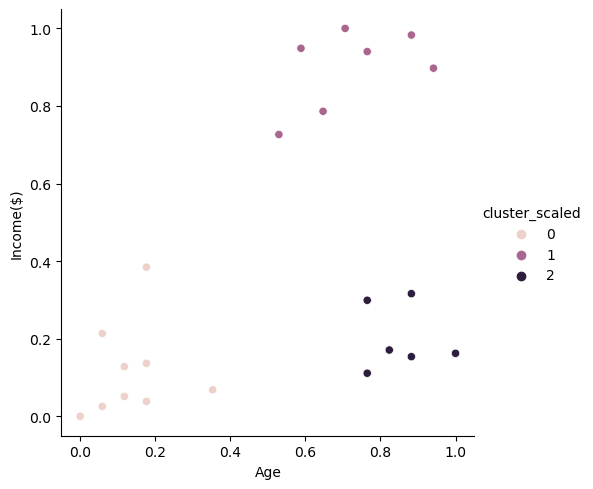

In [41]:
sns.relplot(data = df,x='Age',y='Income($)',hue='cluster_scaled',kind='scatter')
plt.show()

In [42]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [49]:
import warnings

# Filter out the specific warning
warnings.filterwarnings("ignore", category=UserWarning)
k_range = range(1,10)
sse =[]
for i in k_range:
    km = KMeans(n_clusters=i,n_init=10)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
print(sse)

[5.434011511988179, 2.091136388699078, 0.4750783498553096, 0.3625079900797329, 0.2621792762345213, 0.2203764169077067, 0.1685851223602976, 0.13265419827245162, 0.10497488680620909]


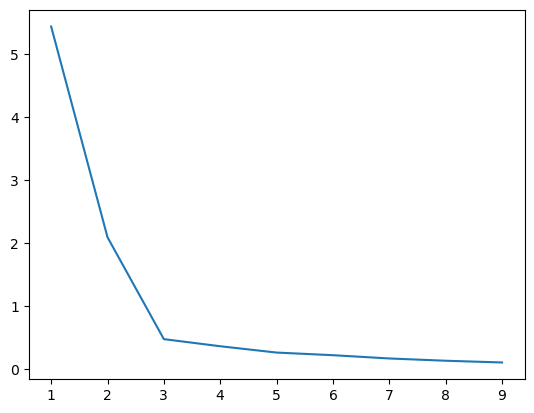

In [51]:
plt.plot(k_range,sse)
plt.show()

<h4> Our required value of K is 3. </h4>